# Alessia's guideline to colormaps in matplotlib and seaborn

## Content
* [Colormaps in matplotlib](#colormaps-matplotlib)
    * [Built-in cmaps](#colormaps-matplotlib-built-in)
    * [Custom cmaps](#colormaps-matplotlib-custom)
* [Colormaps in seaborn](#colormaps-seaborn)

### Imports

In [1]:
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

### Function to generate colormap overview figure

In [2]:
def get_LinearSegmentedColormap(name, list_colors, N=256):
    return LinearSegmentedColormap.from_list(name, list_colors, N=N)

In [3]:
def generate_colormap_overview(
    list_cmaps,
    suptitle, 
    filename_target):
    
    len_cmaps = len(list_cmaps)
    ncols = int(math.sqrt(len_cmaps))
    nrows = math.ceil(len_cmaps / ncols)

    def plot_cmap(cmap, axis):
        mpl.colorbar.ColorbarBase(axis, cmap=cmap, orientation = 'horizontal')
        axis.set_title(cmap.name)

    fig, axis = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(ncols*2, nrows+2)
    )

    for axis, cmap in zip(axis.flatten()[:len_cmaps], list_cmaps):
        plot_cmap(cmap, axis)

    plt.suptitle(suptitle + '\n', fontsize=25)
    plt.tight_layout()
    plt.savefig(filename_target)

## Colormaps in matplotlib <a class="anchor" id="colormaps-matplotlib"></a>

### Matplotlib built-in cmaps <a class="anchor" id="colormaps-matplotlib-built-in"></a>

In [4]:
# list containing ids (as str) of built-in cmaps of matplotlib
list_ids_mpl_cmaps_built_in = sorted(
    plt.colormaps(), 
    key=lambda x: x.lower())

# list containing objects (as matplotlib.colors.ListedColormap or matplotlib.colors.LinearSegmentedColormap) of built-in cmaps of matplotlib
list_objects_mpl_cmaps_built_in = [plt.get_cmap(cmap) for cmap in list_ids_mpl_cmaps_built_in]

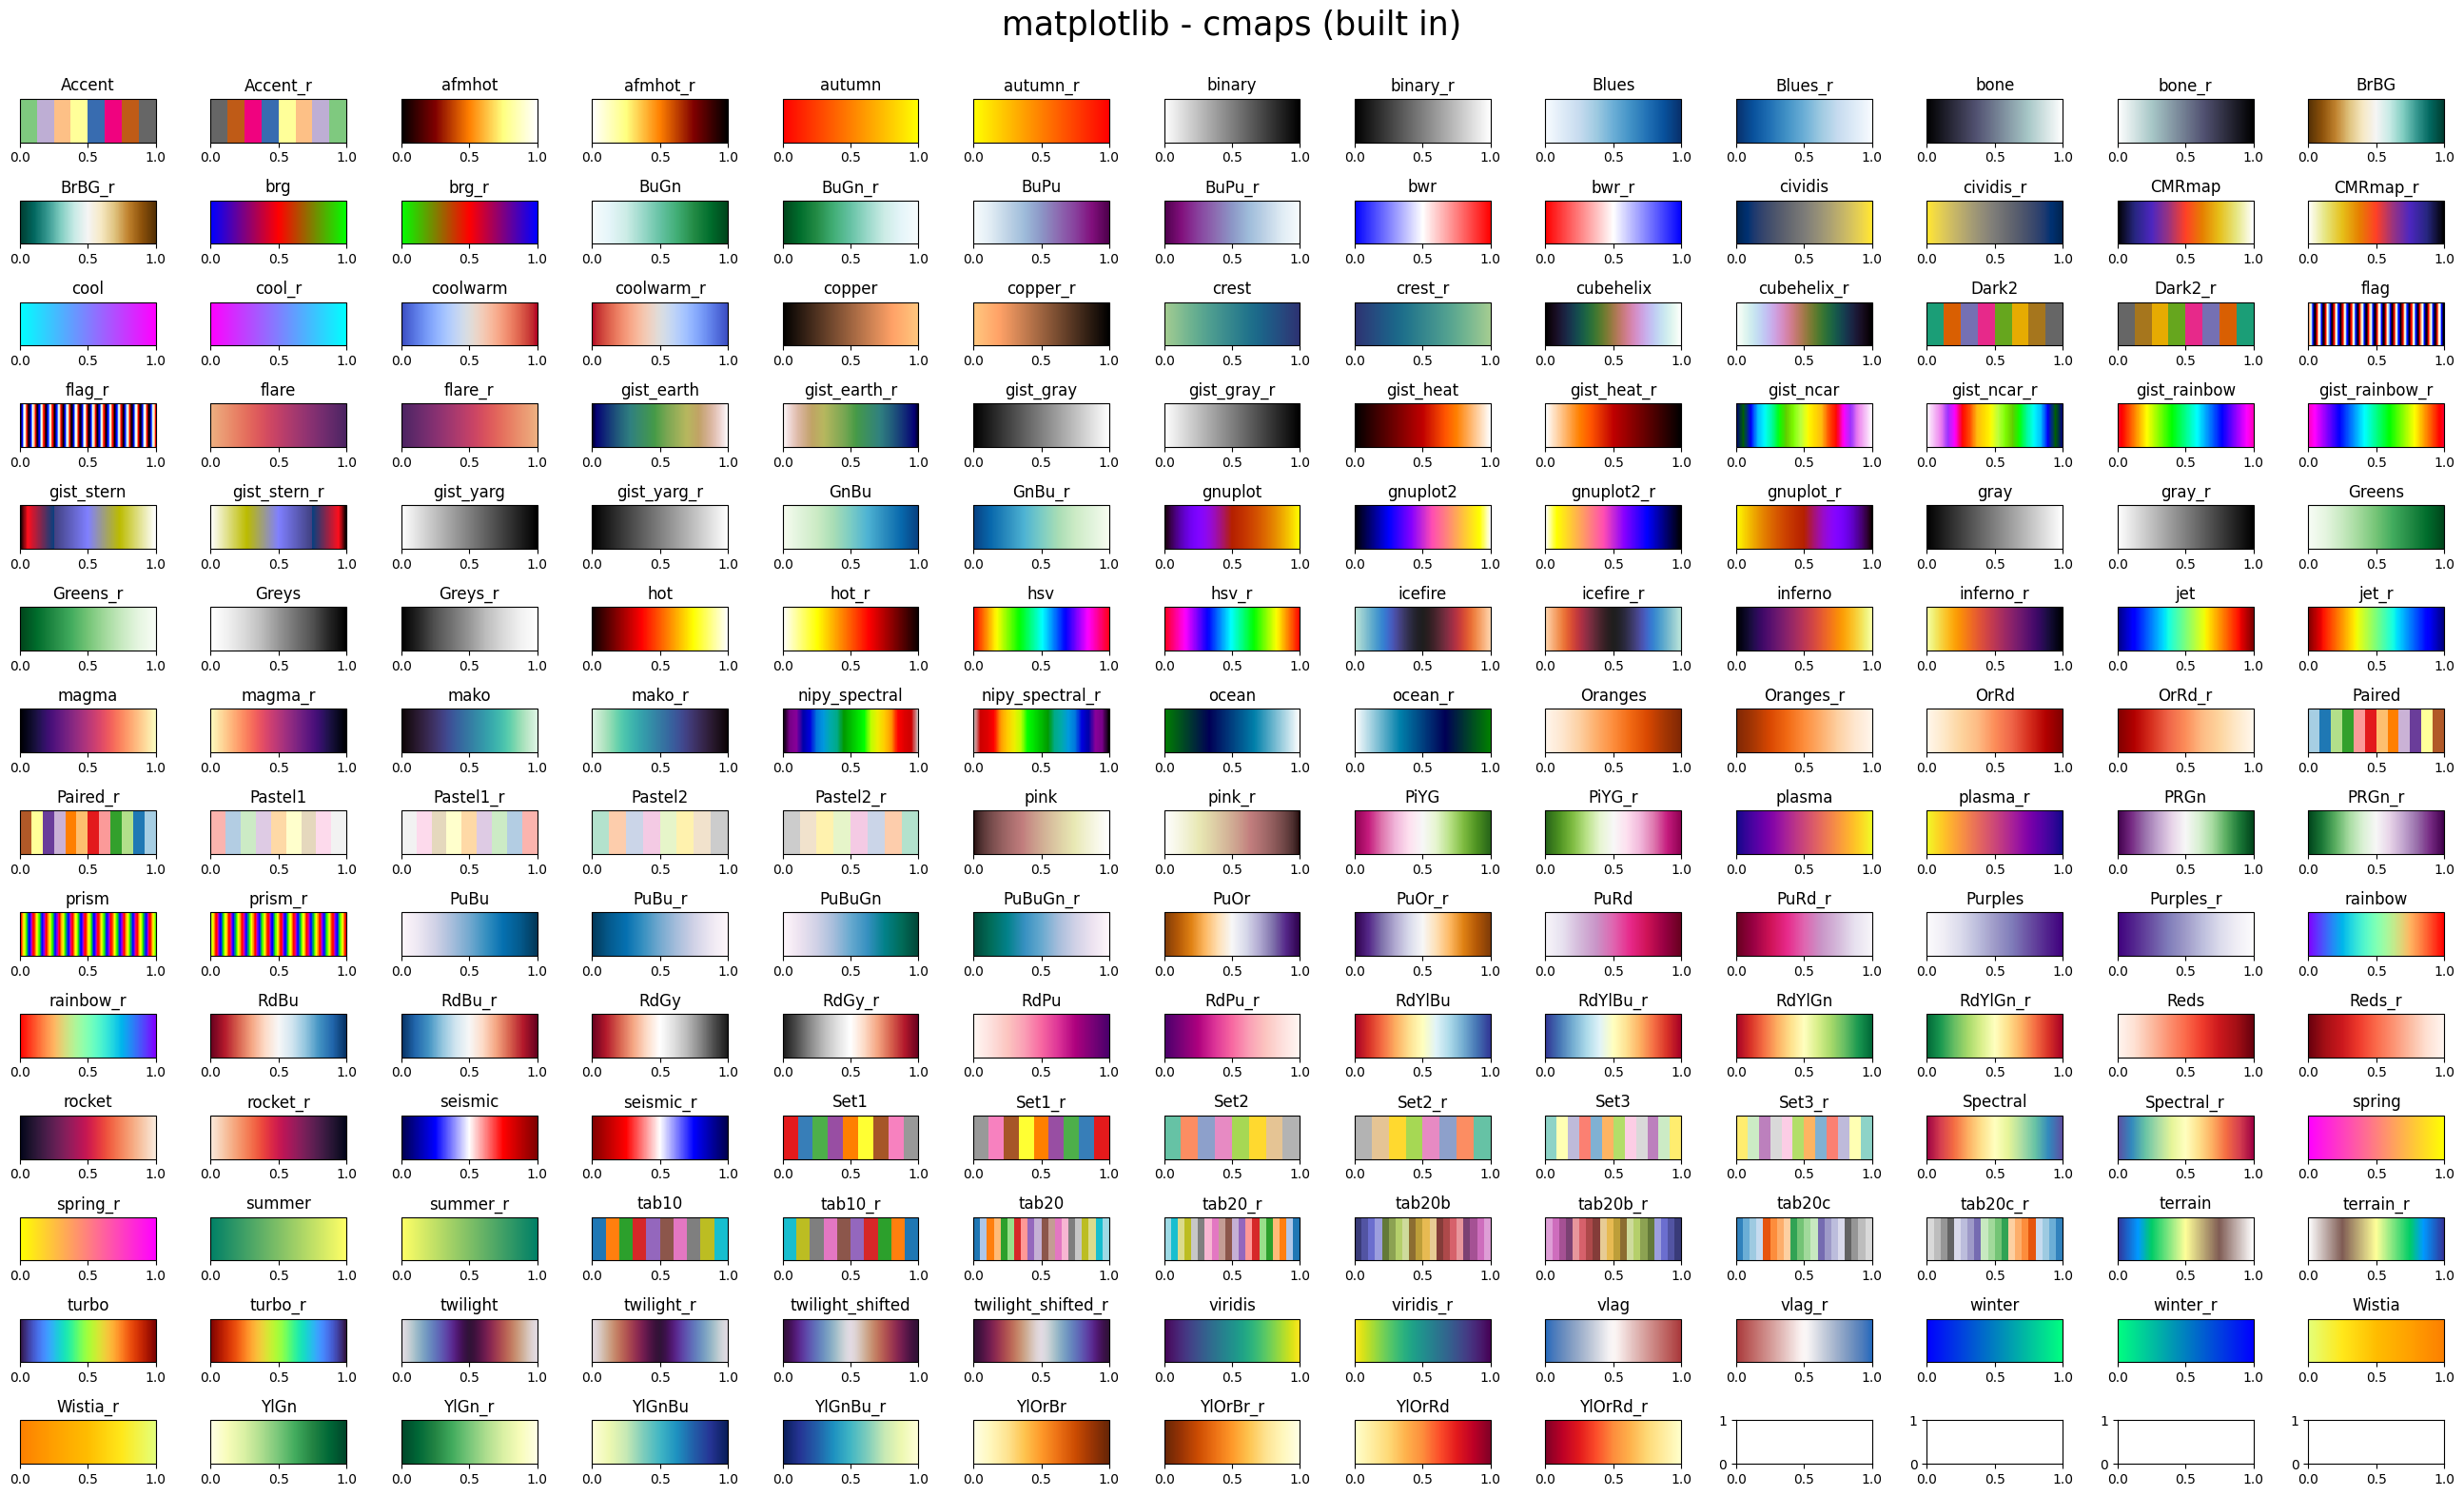

In [5]:
generate_colormap_overview(
    list_cmaps=list_objects_mpl_cmaps_built_in,
    suptitle='matplotlib - cmaps (built in)', 
    filename_target='matplotlib_cmaps_built_in.png')

### Custom cmaps in matplotlib <a class="anchor" id="colormaps-matplotlib-custom"></a>


Besides the built-in cmaps, matplotlib offers the option to generate custom colormaps as well:

For normal, continuos cmaps the syntax is:

```python
    cmap = LinearSegmentedColormap.from_list(
        'my_cmap_name', 
        ['color1', 'color2', 'color3'])
```

For a colormap with discrete colors, add the number of colors as Argument N:

```python
    cmap = LinearSegmentedColormap.from_list(
        'my_cmap_name', 
        ['color1', 'color2', 'color3'], 
        N=x)
```


#### Some of the colormaps I have used:

In [6]:
# dict containing custom palette names as keys and corresponding lists of colors as values
dict_info_mpl_cmaps_custom = {
    'tica_bachelors_thesis': ["#000000", "#050069", "#0001dd", "#0079e0", "#00a3e0", "#00d0e0", "#00e0ce", "#00e087", "#45ff60", "#acff85", "#e0ff85", "#f4ff2c", "#ffffc1", "#c1c1c1"],
    'pca_bachelors_thesis': ["#000000", "#321354", "#5f22a3", "#7e2eb3", "#b80bb8", "#ff2afb", "#df44b2", "#fc496d","#ec4e4e","#f4694b","#ff7e05","#f0c260","#eef060","#fbfcae","#c1c1c1"],
    'rmsd_2D_TC_PR_FF': ["#001B35", "#ffffff"],
    'pca_TC_PR_FF': ["#090154", "#414487",  "#2a788e",  "#22a884",  "#7ad151",  "#fde725",  "orange",  "tomato"]
}

# list containing LinearSegmentedColormap objects of custom palette names
list_objects_mpl_cmaps_custom = [get_LinearSegmentedColormap(name, colors) for (name, colors) in dict_info_mpl_cmaps_custom.items()]

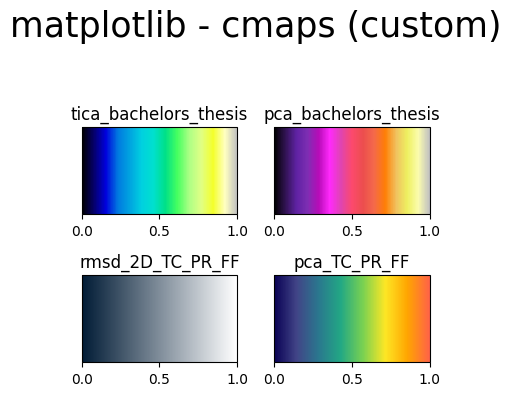

In [7]:
generate_colormap_overview(
    list_cmaps=list_objects_mpl_cmaps_custom,
    suptitle='matplotlib - cmaps (custom)', 
    filename_target='matplotlib_cmaps_custom.png')

## Colormaps in seaborn <a class="anchor" id="colormaps-seaborn"></a>

- Any matplotlib cmap-name (id) can be used in seaborn as well!
- A sequence of colors in any format matplotlib accepts (e.g.: ['lightblue', 'lightgreen', '#fdfd96'], as seen below) can be used.
- Custom color-gradients can be created using the keyword 'dark', 'light' or 'blend', followed by ':' and one or two colors (substitute pink and organge from the example below).

In [8]:
list_colors_sns_palettes = [
    'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind',  # built-ins
    'light:pink', 'dark:pink', 'blend:pink,orange',             # examples custom palettes
    'hls', 'husl',                                              # hsl palettes
    ['lightblue', 'lightgreen', '#fdfd96']                      # example color sequence palette
]                     

# dict containing palette names as keys and corresponding lists of colors as values
dict_info_sns_palettes = {
    str(palette_name): sns.color_palette(palette_name).as_hex() 
        for palette_name 
        in list_colors_sns_palettes
}

# list containing LinearSegmentedColormap objects of palette names
list_objects_sns_palettes = [get_LinearSegmentedColormap(name, colors, N=len(colors)) if len(colors) > 6 
                else get_LinearSegmentedColormap(name, colors)
                    for (name, colors) 
                    in dict_info_sns_palettes.items()]

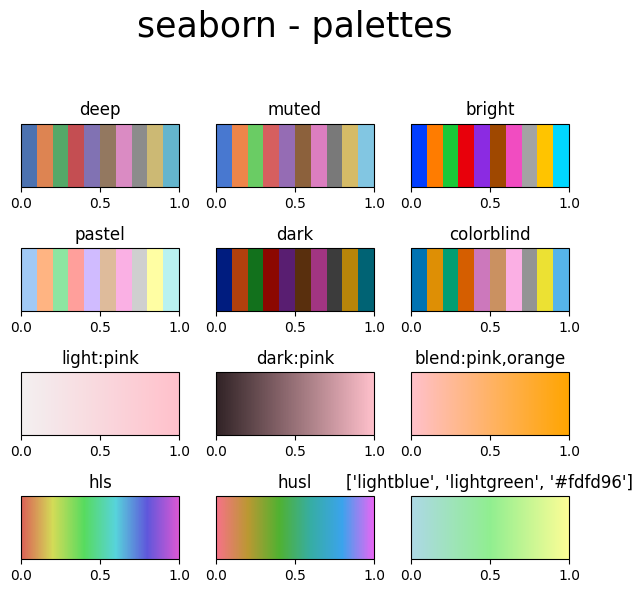

In [9]:
generate_colormap_overview(
    list_cmaps=list_objects_sns_palettes,
    suptitle='seaborn - palettes', 
    filename_target='seaborn_palettes.png')